In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import pair_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
penguin_data = pd.read_csv(
  'https://raw.githubusercontent.com/cdavidshaffer/CPSC4970-AI/master/data/penguins.csv',
  na_values=["?", " ?"]
)
penguin_data.info()
penguin_data = penguin_data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
display(penguin_data)
penguin_data.info()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
feature_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguin_data[feature_cols]
y = penguin_data["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0,
    stratify=y       
)

In [6]:
display(X)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [7]:
display(y)

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

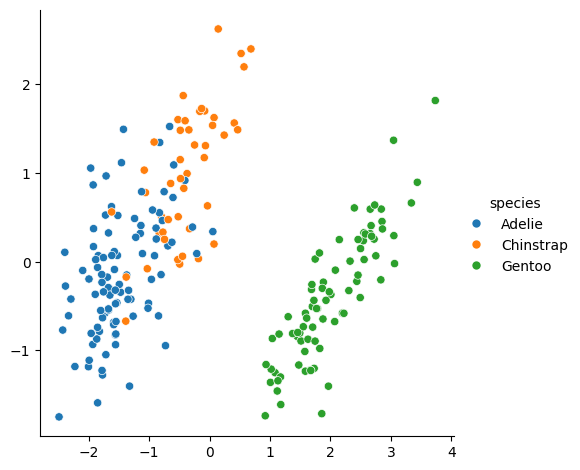

In [9]:
sns.relplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue=y_train,
    kind="scatter"
)

### Discussion 1

From the above plot, we are able to see that reducing four features down to two using principal component analysis forms three different species into three different distinct clusters. There is overlap between some of the points, but we can see that using K Means would be good for this dataset.

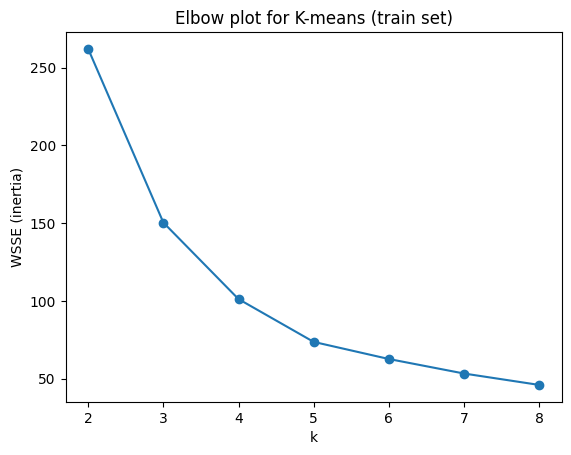

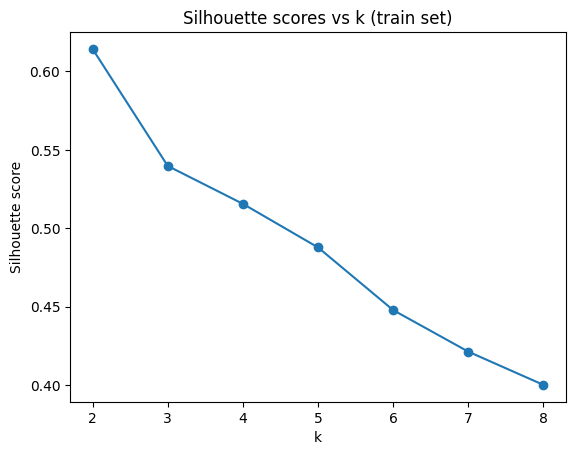

In [10]:
ks = range(2, 9)
wsse = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit(X_train_pca)
    
    wsse.append(km.inertia_) 
    sil_scores.append(silhouette_score(X_train_pca, km.labels_))

plt.figure()
plt.plot(ks, wsse, marker="o")
plt.xlabel("k")
plt.ylabel("WSSE (inertia)")
plt.title("Elbow plot for K-means (train set)")
plt.show()

plt.figure()
plt.plot(ks, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores vs k (train set)")
plt.show()

### Discussion 2

We used k-means on the pca transformed data for k from 2 to 8. The WSSE curve shows a clear elbow shape around k = 3. After k = 3, we can see that the decline is not as steep.
For the silhouette score we can observe that the score is high at 2 and relatively high at 3. The score does not improve after k = 3. We do know that there are 3 species in the dataset and we use the information from the WSSE and silhouette to support our choice of k = 3 clusters.

In [11]:
best_k = 3  

kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
kmeans.fit(X_train_pca)

train_clusters = kmeans.labels_
test_clusters  = kmeans.predict(X_test_pca)

In [13]:
pcm_train = pair_confusion_matrix(y_train, train_clusters)
tn, fp, fn, tp = pcm_train.ravel()
train_pairwise_acc = (tn + tp) / pcm_train.sum()

print("Train pair-wise confusion matrix:\n", pcm_train)
print("Train pair-wise accuracy:", train_pairwise_acc)

pcm_test = pair_confusion_matrix(y_test, test_clusters)
tn, fp, fn, tp = pcm_test.ravel()
test_pairwise_acc = (tn + tp) / pcm_test.sum()

print("Test pair-wise confusion matrix:\n", pcm_test)
print("Test pair-wise accuracy:", test_pairwise_acc)

Train pair-wise confusion matrix:
 [[29288  2412]
 [ 3672 14134]]
Train pair-wise accuracy: 0.8771058053569264
Test pair-wise confusion matrix:
 [[7144  744]
 [1016 3306]]
Test pair-wise accuracy: 0.8558558558558559


### Discussion 3

After choosing k = 3, we compared the k-means clusters to the true species labels using pair-wise accuracy. We achieved 88% on the training set, which means that about 88% of all pairs of penguins are treated consistently by the clustering algorithm. On the test set, we achieved a pair-wise accuracy of about 86%, which shows similar behavior on unseen data.

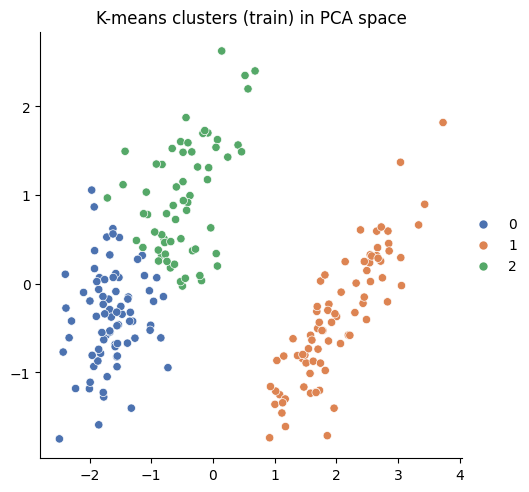

In [14]:
sns.relplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue=train_clusters,
    kind="scatter",
    palette="deep"
)
plt.title("K-means clusters (train) in PCA space")
plt.show()

#### Do the principle components of the numerical features produce a set of data conducive to cluster analysis that would properly separate the the species into separate clusters?

I would say yes, overall, the principal components of the numeric features did produce a representation that is conducive to cluster analysis. It wasn't perfect but it did a pretty good job given our visualization of the plots.